## ## 1) Cell 1 — Imports + Seed

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(42)


## 2) Cell 2 —  Plot + Dense

In [3]:
def plot_history(history, title_prefix="Model"):
    hist = history.history
    epochs = range(1, len(hist.get("loss", [])) + 1)

    # Loss
    if "loss" in hist:
        plt.figure()
        plt.plot(epochs, hist["loss"], label="train_loss")
        if "val_loss" in hist:
            plt.plot(epochs, hist["val_loss"], label="val_loss")
        plt.title(f"{title_prefix} - Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)

    # Accuracy (keys can differ by TF version)
    acc_key = "accuracy" if "accuracy" in hist else ("acc" if "acc" in hist else None)
    val_acc_key = "val_accuracy" if "val_accuracy" in hist else ("val_acc" if "val_acc" in hist else None)

    if acc_key is not None:
        plt.figure()
        plt.plot(epochs, hist[acc_key], label="train_accuracy")
        if val_acc_key is not None:
            plt.plot(epochs, hist[val_acc_key], label="val_accuracy")
        plt.title(f"{title_prefix} - Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)

    plt.show()


def build_dense_classifier(input_dim, num_classes=10, hidden_units=(256, 128), dropout=0.2, lr=1e-3):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    for u in hidden_units:
        model.add(layers.Dense(u, activation="relu"))
        if dropout and dropout > 0:
            model.add(layers.Dropout(dropout))

    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


## 4) Cell 4 — Task 2: Fashion-MNIST (Normalize + Flatten)

Epoch 1/10
422/422 - 2s - 5ms/step - accuracy: 0.7747 - loss: 0.6335 - val_accuracy: 0.8483 - val_loss: 0.4127
Epoch 2/10
422/422 - 1s - 3ms/step - accuracy: 0.8428 - loss: 0.4363 - val_accuracy: 0.8588 - val_loss: 0.3875
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.8551 - loss: 0.3983 - val_accuracy: 0.8652 - val_loss: 0.3630
Epoch 4/10
422/422 - 1s - 3ms/step - accuracy: 0.8654 - loss: 0.3720 - val_accuracy: 0.8752 - val_loss: 0.3484
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.8726 - loss: 0.3553 - val_accuracy: 0.8803 - val_loss: 0.3335
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.8740 - loss: 0.3426 - val_accuracy: 0.8818 - val_loss: 0.3216
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.8797 - loss: 0.3288 - val_accuracy: 0.8763 - val_loss: 0.3383
Epoch 8/10
422/422 - 1s - 3ms/step - accuracy: 0.8817 - loss: 0.3228 - val_accuracy: 0.8845 - val_loss: 0.3149
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.8844 - loss: 0.3127 - val_accuracy: 0.8818 - val_loss: 0.3194
E

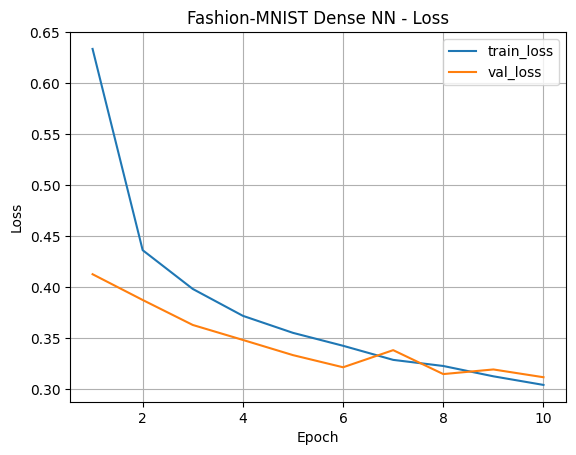

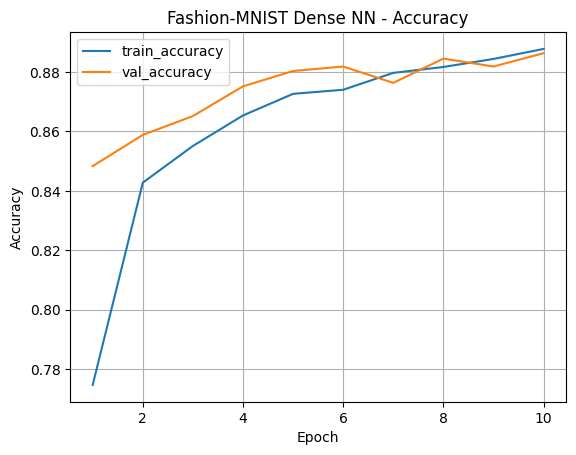

In [4]:
# Task 2: Fashion-MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize (required) + Flatten (required)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train.reshape((x_train.shape[0], -1))
x_test  = x_test.reshape((x_test.shape[0], -1))

model_fashion = build_dense_classifier(
    input_dim=x_train.shape[1],
    num_classes=10,
    hidden_units=(256, 128),
    dropout=0.3
)

history_fashion = model_fashion.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=2
)

test_loss, test_acc = model_fashion.evaluate(x_test, y_test, verbose=0)
print(f"[Fashion-MNIST] Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

plot_history(history_fashion, title_prefix="Fashion-MNIST Dense NN")


## 5) Cell 5 — Task 3: CIFAR-10 (Dense Only + Flatten)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 144s 1us/step
Epoch 1/15
352/352 - 7s - 20ms/step - accuracy: 0.1864 - loss: 2.1494 - val_accuracy: 0.2692 - val_loss: 2.0016
Epoch 2/15
352/352 - 6s - 17ms/step - accuracy: 0.2305 - loss: 2.0200 - val_accuracy: 0.2980 - val_loss: 1.9549
Epoch 3/15
352/352 - 6s - 16ms/step - accuracy: 0.2456 - loss: 1.9813 - val_accuracy: 0.2914 - val_loss: 1.9372
Epoch 4/15
352/352 - 5s - 15ms/step - accuracy: 0.2582 - loss: 1.9625 - val_accuracy: 0.2960 - val_loss: 1.9111
Epoch 5/15
352/352 - 5s - 16ms/step - accuracy: 0.2705 - loss: 1.9471 - val_accuracy: 0.2922 - val_loss: 1.9054
Epoch 6/15
352/352 - 5s - 15ms/step - accuracy: 0.2814 - loss: 1.9267 - val_accuracy: 0.3182 - val_loss: 1.8985
Epoch 7/15
352/352 - 6s - 17ms/step - accurac

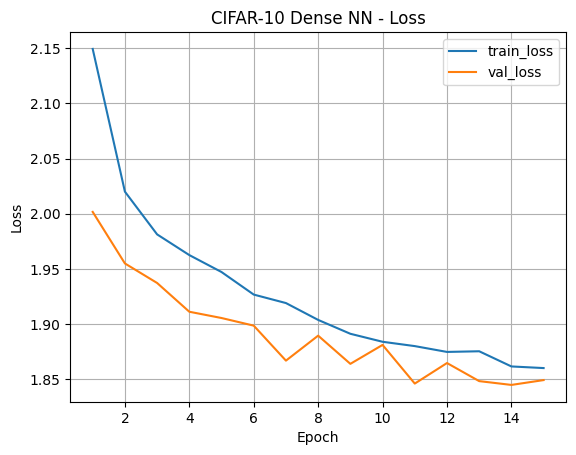

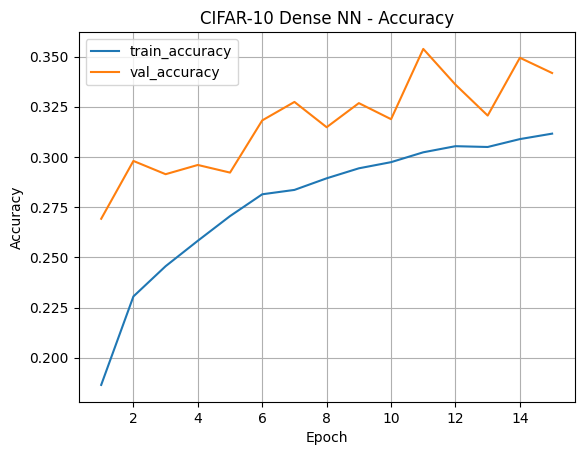

In [5]:
# Task 3: CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# y comes as (N,1) -> squeeze
y_train = y_train.squeeze()
y_test  = y_test.squeeze()

# Normalize + Flatten (required)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = x_train.reshape((x_train.shape[0], -1))  # 32*32*3 = 3072
x_test  = x_test.reshape((x_test.shape[0], -1))

model_cifar = build_dense_classifier(
    input_dim=x_train.shape[1],
    num_classes=10,
    hidden_units=(512, 256, 128),
    dropout=0.4,
    lr=1e-3
)

history_cifar = model_cifar.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=15,          # CIFAR أصعب مع Dense-only
    batch_size=128,
    verbose=2
)

test_loss, test_acc = model_cifar.evaluate(x_test, y_test, verbose=0)
print(f"[CIFAR-10] Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# المطلوب الأساسي في CIFAR هو accuracy curves (وده هيتعمل هنا)
plot_history(history_cifar, title_prefix="CIFAR-10 Dense NN")
